In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import pathlib

In [2]:
data_dir = pathlib.Path('RiceLeaf1')

list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*.jpg'))

In [3]:
image_count = len(list(list_ds))
print(image_count)

119


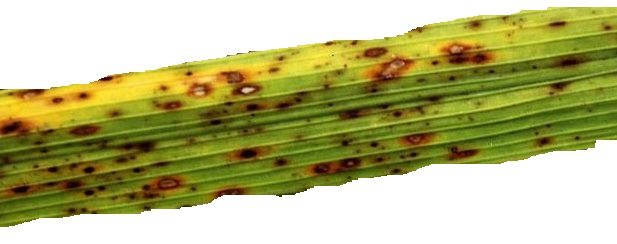

In [4]:
find = list(data_dir.glob('Brown spot/*'))
PIL.Image.open(str(find[1]))

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, input_shape = (64,64,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(3))
model.add(Activation('softmax'))  # output layers

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [7]:
model.compile(optimizer = RMSprop(),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255, rotation_range = 40,
                               width_shift_range = 0.2, height_shift_range = 0.2,
                               shear_range = 0.2, zoom_range = 0.2,
                               horizontal_flip = True, fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale = 1/255)

In [9]:
BS = 10
IS = (64,64)

train_gen = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2,
                                                        subset="training", seed=100, image_size = IS, batch_size = BS, label_mode = 'categorical')

val_gen = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2,
                                                      subset="validation", seed=100, image_size = IS, batch_size = BS, label_mode = 'categorical', shuffle = False)

Found 119 files belonging to 3 classes.
Using 96 files for training.
Found 119 files belonging to 3 classes.
Using 23 files for validation.


In [10]:
train_gen.class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [11]:
history = model.fit(train_gen.repeat(),
                    steps_per_epoch = 96//BS,
                    epochs = 45,
                    verbose = 2,
                    validation_data = val_gen,
                    validation_steps = 23//BS)

Epoch 1/45
9/9 - 9s - loss: 6.8211 - accuracy: 0.2556 - val_loss: 1.1325 - val_accuracy: 0.2000
Epoch 2/45
9/9 - 1s - loss: 1.2930 - accuracy: 0.4186 - val_loss: 1.1459 - val_accuracy: 0.2500
Epoch 3/45
9/9 - 1s - loss: 1.1510 - accuracy: 0.3953 - val_loss: 1.5123 - val_accuracy: 0.0500
Epoch 4/45
9/9 - 1s - loss: 1.1418 - accuracy: 0.4419 - val_loss: 1.4920 - val_accuracy: 0.0500
Epoch 5/45
9/9 - 1s - loss: 1.4589 - accuracy: 0.3837 - val_loss: 1.3502 - val_accuracy: 0.0000e+00
Epoch 6/45
9/9 - 1s - loss: 1.0945 - accuracy: 0.4767 - val_loss: 1.0526 - val_accuracy: 0.3000
Epoch 7/45
9/9 - 1s - loss: 1.1824 - accuracy: 0.3953 - val_loss: 1.0532 - val_accuracy: 0.2500
Epoch 8/45
9/9 - 1s - loss: 1.1014 - accuracy: 0.4186 - val_loss: 1.0974 - val_accuracy: 0.4000
Epoch 9/45
9/9 - 1s - loss: 1.1417 - accuracy: 0.4302 - val_loss: 0.7063 - val_accuracy: 0.9500
Epoch 10/45
9/9 - 1s - loss: 1.2685 - accuracy: 0.4186 - val_loss: 1.0580 - val_accuracy: 0.5500
Epoch 11/45
9/9 - 1s - loss: 1.0168

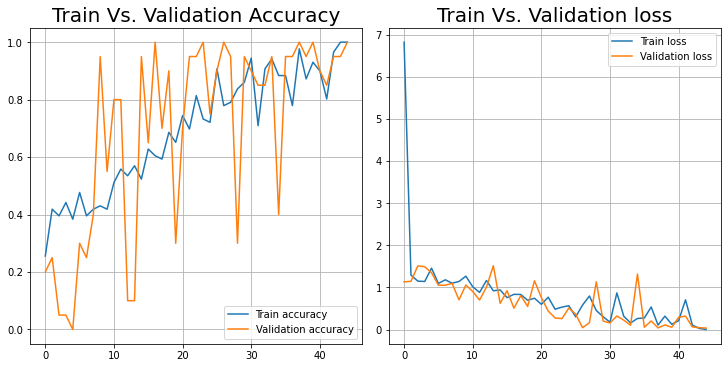

In [12]:
from matplotlib import rcParams

rcParams['figure.figsize']=(10,5)
fig,ax=plt.subplots(1,2,constrained_layout=True)

ax[0].plot(range(45), history.history['accuracy'],history.history['val_accuracy'])
ax[0].set_title('Train Vs. Validation Accuracy', color = 'black', fontsize=20)
ax[0].legend(['Train accuracy',"Validation accuracy"])
ax[0].grid()

ax[1].plot(range(45), history.history['loss'],history.history['val_loss'])
ax[1].set_title('Train Vs. Validation loss', color = 'black', fontsize=20)
ax[1].legend(['Train loss',"Validation loss"])
ax[1].grid()

plt.show()

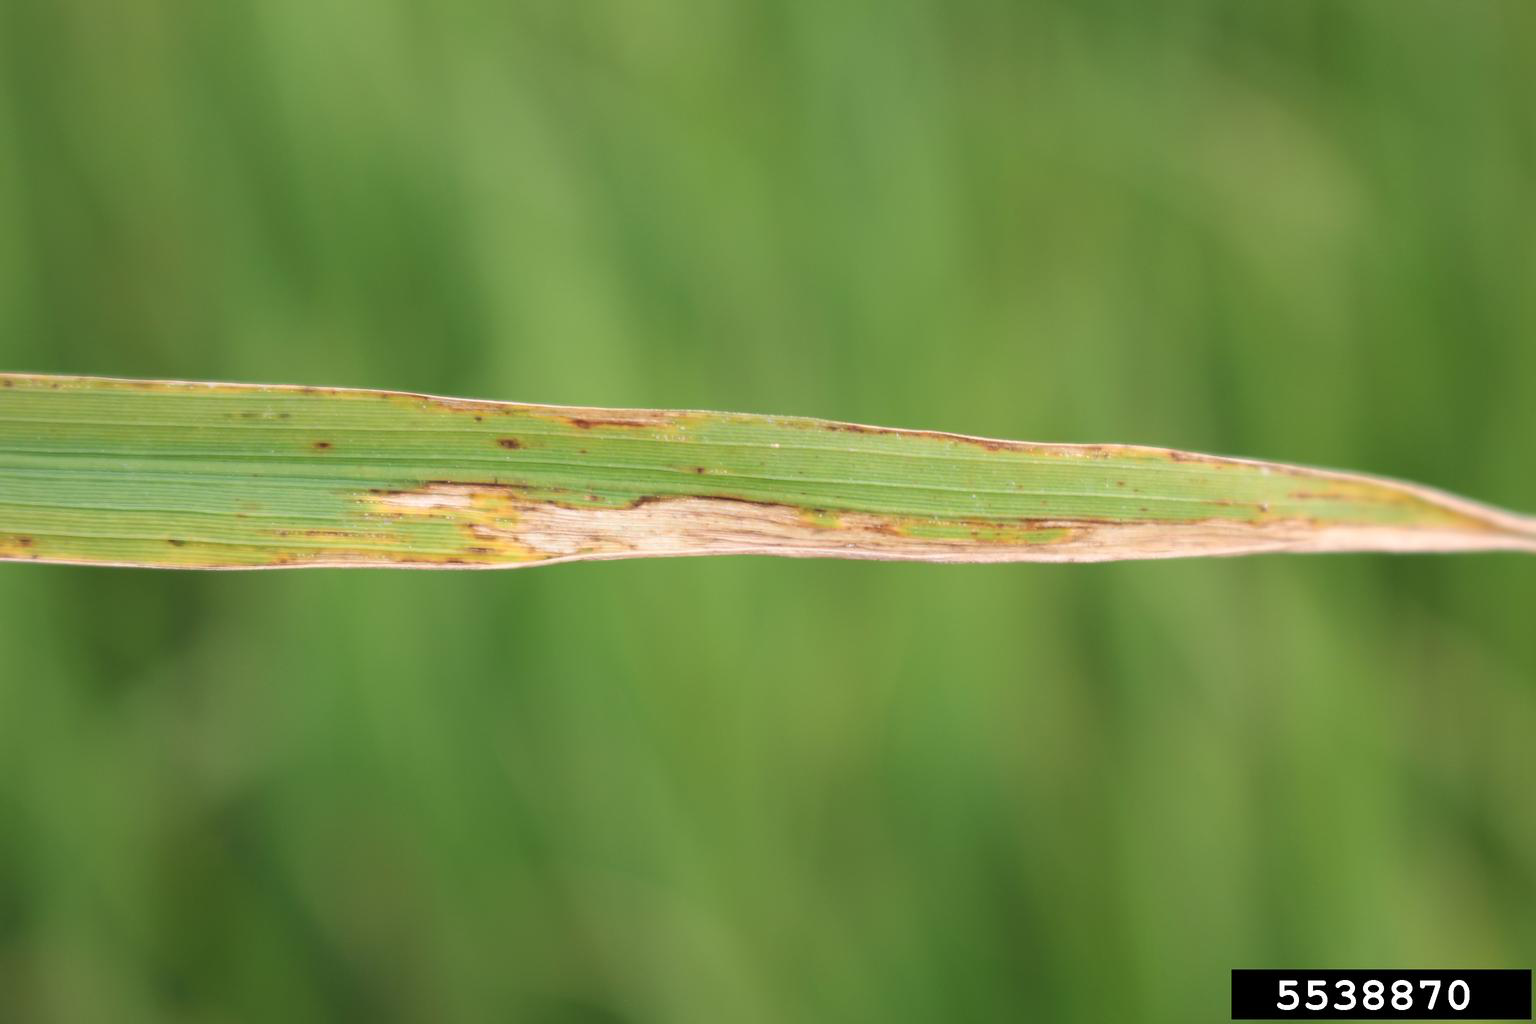

In [13]:
img = load_img('BLB2.jpg')
img

In [14]:
resized_image = img.resize([64,64])
x = img_to_array(resized_image)
x = x.reshape((1,) + x.shape)
print(x)
model.predict(x)

[[[[ 89. 120.  53.]
   [ 90. 120.  54.]
   [ 98. 124.  57.]
   ...
   [102. 130.  63.]
   [102. 128.  59.]
   [101. 127.  54.]]

  [[ 88. 119.  52.]
   [ 89. 119.  53.]
   [ 95. 122.  55.]
   ...
   [100. 129.  62.]
   [101. 128.  58.]
   [100. 127.  54.]]

  [[ 88. 119.  52.]
   [ 88. 118.  52.]
   [ 93. 121.  55.]
   ...
   [ 98. 130.  60.]
   [ 99. 128.  57.]
   [ 99. 126.  52.]]

  ...

  [[ 79.  95.  44.]
   [ 88. 105.  50.]
   [ 99. 118.  59.]
   ...
   [ 23.  22.  25.]
   [  0.   0.   0.]
   [ 11.  14.   7.]]

  [[ 80.  95.  45.]
   [ 89. 105.  51.]
   [ 99. 117.  60.]
   ...
   [ 35.  35.  37.]
   [  0.   0.   0.]
   [ 12.  16.   7.]]

  [[ 80.  95.  47.]
   [ 88. 104.  51.]
   [ 98. 115.  59.]
   ...
   [ 37.  42.  24.]
   [ 28.  33.  15.]
   [ 36.  44.  21.]]]]


array([[9.9796224e-01, 1.3842573e-03, 6.5346889e-04]], dtype=float32)

In [15]:
rounded_predictions = np.argmax(model.predict(x), axis = 1)
rounded_predictions

array([0], dtype=int64)

In [16]:
a = rounded_predictions
 
if a == 0:
    print ('Bacterial leaf blight')
elif a == 1:
    print ('Brown spot')
elif a == 2:
    print('Leaf smut')

Bacterial leaf blight


In [17]:
import os.path
if os.path.isfile('Projects/100_100_model.h5') is False:
    model.save('Projects/100_100_model.h5')